In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
companies = pd.read_csv('ind_nifty200list.csv')
Symbols = companies['Symbol'].tolist()
company = input(f"Enter the Company Name from {Symbols}whose price you want to predict ").upper()+'.NS'

Enter the Company Name from ['ACC', 'AUBANK', 'AARTIIND', 'ABBOTINDIA', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'ATGL', 'ADANITRANS', 'ABCAPITAL', 'ABFRL', 'AJANTPHARM', 'APLLTD', 'ALKEM', 'AMARAJABAT', 'AMBUJACEM', 'APOLLOHOSP', 'APOLLOTYRE', 'ASHOKLEY', 'ASIANPAINT', 'AUROPHARMA', 'DMART', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BAJAJHLDNG', 'BALKRISIND', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'BATAINDIA', 'BERGEPAINT', 'BEL', 'BHARATFORG', 'BHEL', 'BPCL', 'BHARTIARTL', 'BIOCON', 'BBTC', 'BOSCHLTD', 'BRITANNIA', 'CESC', 'CADILAHC', 'CANBK', 'CASTROLIND', 'CHOLAFIN', 'CIPLA', 'CUB', 'COALINDIA', 'COFORGE', 'COLPAL', 'CONCOR', 'COROMANDEL', 'CROMPTON', 'CUMMINSIND', 'DLF', 'DABUR', 'DALBHARAT', 'DEEPAKNTR', 'DHANI', 'DIVISLAB', 'DIXON', 'LALPATHLAB', 'DRREDDY', 'EICHERMOT', 'EMAMILTD', 'ENDURANCE', 'ESCORTS', 'EXIDEIND', 'FEDERALBNK', 'FORTIS', 'GAIL', 'GMRINFRA', 'GLAND', 'GLENMARK', 'GODREJAGRO', 'GODREJCP', 'GODREJIND', 'GODREJPROP', 'GRASIM', 'GUJGASLTD', 'GSPL', '

In [21]:
days = int(input("Till how many days you want the predictions? "))

Till how many days you want the predictions? 5


In [22]:
data = pd.read_csv(f'NiftyStocks\{company}.csv')

In [23]:
def data_preprocessing(data,days):
    data.dropna(inplace = True)
    label = data['Close'].shift(-days)
    data = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
    x = data.iloc[:-days , :-1].values
    sc = StandardScaler()
    x = sc.fit_transform(x)
    x_lately = x[-days:]
    label.dropna(inplace=True)
    y = np.array(label)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
    return [x,y,x_lately]

In [24]:
x, y, x_lately = data_preprocessing(data,days)

In [25]:
ann = tf.keras.models.Sequential()

In [26]:
ann.add(tf.keras.layers.Dense(units = 4 , activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 32 , activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 16 , activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 4 , activation = 'relu'))

In [27]:
ann.add(tf.keras.layers.Dense(units = 1))

In [28]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse','mape'])

In [29]:
ann.fit(x,y, batch_size=32, epochs=2000)

Epoch 1/2000
2/2 [==============================] - 0s 1ms/step - loss: 12561626.0000 - mae: 3543.1379 - mse: 12561626.0000 - mape: 99.9912
Epoch 2/2000
2/2 [==============================] - 0s 3ms/step - loss: 12561201.0000 - mae: 3543.0784 - mse: 12561201.0000 - mape: 99.9895
Epoch 3/2000
2/2 [==============================] - 0s 4ms/step - loss: 12560774.0000 - mae: 3543.0183 - mse: 12560774.0000 - mape: 99.9878
Epoch 4/2000
2/2 [==============================] - 0s 2ms/step - loss: 12560275.0000 - mae: 3542.9482 - mse: 12560275.0000 - mape: 99.9858
Epoch 5/2000
2/2 [==============================] - 0s 1ms/step - loss: 12559797.0000 - mae: 3542.8811 - mse: 12559797.0000 - mape: 99.9839
Epoch 6/2000
2/2 [==============================] - 0s 2ms/step - loss: 12559294.0000 - mae: 3542.8103 - mse: 12559294.0000 - mape: 99.9819
Epoch 7/2000
2/2 [==============================] - 0s 3ms/step - loss: 12558752.0000 - mae: 3542.7339 - mse: 12558752.0000 - mape: 99.9798
Epoch 8/2000
2/2 [==

2/2 [==============================] - 0s 3ms/step - loss: 12147548.0000 - mae: 3484.4478 - mse: 12147548.0000 - mape: 98.3445
Epoch 59/2000
2/2 [==============================] - 0s 2ms/step - loss: 12113675.0000 - mae: 3479.5999 - mse: 12113675.0000 - mape: 98.2087
Epoch 60/2000
2/2 [==============================] - 0s 2ms/step - loss: 12078273.0000 - mae: 3474.5110 - mse: 12078273.0000 - mape: 98.0659
Epoch 61/2000
2/2 [==============================] - 0s 3ms/step - loss: 12041249.0000 - mae: 3469.1880 - mse: 12041249.0000 - mape: 97.9166
Epoch 62/2000
2/2 [==============================] - 0s 1ms/step - loss: 11999379.0000 - mae: 3463.1377 - mse: 11999379.0000 - mape: 97.7467
Epoch 63/2000
2/2 [==============================] - 0s 3ms/step - loss: 11954561.0000 - mae: 3456.6567 - mse: 11954561.0000 - mape: 97.5649
Epoch 64/2000
2/2 [==============================] - 0s 1000us/step - loss: 11908763.0000 - mae: 3450.0327 - mse: 11908763.0000 - mape: 97.3794
Epoch 65/2000
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 3522677.0000 - mae: 1692.7921 - mse: 3522677.0000 - mape: 48.0887
Epoch 117/2000
2/2 [==============================] - 0s 3ms/step - loss: 3378548.7500 - mae: 1656.2024 - mse: 3378548.7500 - mape: 47.0578
Epoch 118/2000
2/2 [==============================] - 0s 2ms/step - loss: 3261102.5000 - mae: 1629.8236 - mse: 3261102.5000 - mape: 46.3050
Epoch 119/2000
2/2 [==============================] - 0s 2ms/step - loss: 3146095.5000 - mae: 1599.4624 - mse: 3146095.5000 - mape: 45.4455
Epoch 120/2000
2/2 [==============================] - 0s 2ms/step - loss: 3030482.2500 - mae: 1572.6896 - mse: 3030482.2500 - mape: 44.6773
Epoch 121/2000
2/2 [==============================] - 0s 2ms/step - loss: 2941316.7500 - mae: 1551.9597 - mse: 2941316.7500 - mape: 44.0788
Epoch 122/2000
2/2 [==============================] - 0s 2ms/step - loss: 2846319.5000 - mae: 1531.3646 - mse: 2846319.5000 - mape: 43.4844
Epoch 123/2000
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 1071998.6250 - mae: 867.7515 - mse: 1071998.6250 - mape: 24.5364
Epoch 175/2000
2/2 [==============================] - 0s 2ms/step - loss: 1066103.2500 - mae: 865.8716 - mse: 1066103.2500 - mape: 24.4846
Epoch 176/2000
2/2 [==============================] - 0s 3ms/step - loss: 1058765.8750 - mae: 863.6531 - mse: 1058765.8750 - mape: 24.4233
Epoch 177/2000
2/2 [==============================] - 0s 2ms/step - loss: 1053073.2500 - mae: 861.5230 - mse: 1053073.2500 - mape: 24.3641
Epoch 178/2000
2/2 [==============================] - 0s 2ms/step - loss: 1048545.3125 - mae: 860.6204 - mse: 1048545.2500 - mape: 24.3400
Epoch 179/2000
2/2 [==============================] - 0s 1ms/step - loss: 1042294.0000 - mae: 858.6268 - mse: 1042294.0000 - mape: 24.2845
Epoch 180/2000
2/2 [==============================] - 0s 2ms/step - loss: 1038772.3750 - mae: 858.1266 - mse: 1038772.3750 - mape: 24.2717
Epoch 181/2000
2/2 [======================

2/2 [==============================] - 0s 1000us/step - loss: 859192.2500 - mae: 791.0292 - mse: 859192.2500 - mape: 22.3862
Epoch 234/2000
2/2 [==============================] - 0s 2ms/step - loss: 856273.2500 - mae: 789.7245 - mse: 856273.2500 - mape: 22.3493
Epoch 235/2000
2/2 [==============================] - 0s 1ms/step - loss: 852876.3125 - mae: 788.2268 - mse: 852876.3125 - mape: 22.3068
Epoch 236/2000
2/2 [==============================] - 0s 2ms/step - loss: 849592.3125 - mae: 786.9841 - mse: 849592.3125 - mape: 22.2715
Epoch 237/2000
2/2 [==============================] - 0s 1ms/step - loss: 847030.7500 - mae: 785.9082 - mse: 847030.7500 - mape: 22.2413
Epoch 238/2000
2/2 [==============================] - 0s 2ms/step - loss: 843881.4375 - mae: 784.6684 - mse: 843881.4375 - mape: 22.2063
Epoch 239/2000
2/2 [==============================] - 0s 2ms/step - loss: 840330.8125 - mae: 783.2049 - mse: 840330.8125 - mape: 22.1648
Epoch 240/2000
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 650918.3750 - mae: 696.0961 - mse: 650918.3750 - mape: 19.6968
Epoch 293/2000
2/2 [==============================] - 0s 1ms/step - loss: 647486.5625 - mae: 694.2209 - mse: 647486.5625 - mape: 19.6435
Epoch 294/2000
2/2 [==============================] - 0s 999us/step - loss: 643256.1250 - mae: 691.9584 - mse: 643256.1250 - mape: 19.5794
Epoch 295/2000
2/2 [==============================] - 0s 1ms/step - loss: 639636.1875 - mae: 690.1390 - mse: 639636.1875 - mape: 19.5279
Epoch 296/2000
2/2 [==============================] - 0s 3ms/step - loss: 635927.0625 - mae: 688.4391 - mse: 635927.0625 - mape: 19.4795
Epoch 297/2000
2/2 [==============================] - 0s 1ms/step - loss: 631937.4375 - mae: 686.6245 - mse: 631937.4375 - mape: 19.4281
Epoch 298/2000
2/2 [==============================] - 0s 1ms/step - loss: 627946.5625 - mae: 684.6708 - mse: 627946.5625 - mape: 19.3728
Epoch 299/2000
2/2 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 413614.4062 - mae: 555.6954 - mse: 413614.4062 - mape: 15.7119
Epoch 352/2000
2/2 [==============================] - 0s 2ms/step - loss: 409956.1875 - mae: 553.1226 - mse: 409956.1875 - mape: 15.6389
Epoch 353/2000
2/2 [==============================] - 0s 2ms/step - loss: 406331.4375 - mae: 550.5389 - mse: 406331.4375 - mape: 15.5654
Epoch 354/2000
2/2 [==============================] - 0s 2ms/step - loss: 403007.1250 - mae: 548.0793 - mse: 403007.1250 - mape: 15.4956
Epoch 355/2000
2/2 [==============================] - 0s 1ms/step - loss: 399370.0625 - mae: 545.5522 - mse: 399370.0625 - mape: 15.4238
Epoch 356/2000
2/2 [==============================] - 0s 1ms/step - loss: 395894.9062 - mae: 543.1428 - mse: 395894.9062 - mape: 15.3552
Epoch 357/2000
2/2 [==============================] - 0s 2ms/step - loss: 392512.1875 - mae: 540.6389 - mse: 392512.1875 - mape: 15.2842
Epoch 358/2000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 2ms/step - loss: 260054.2188 - mae: 436.6317 - mse: 260054.2188 - mape: 12.3291
Epoch 411/2000
2/2 [==============================] - 0s 2ms/step - loss: 258448.1719 - mae: 435.2372 - mse: 258448.1719 - mape: 12.2896
Epoch 412/2000
2/2 [==============================] - 0s 3ms/step - loss: 256999.0938 - mae: 433.8907 - mse: 256999.0938 - mape: 12.2513
Epoch 413/2000
2/2 [==============================] - 0s 1ms/step - loss: 255175.9062 - mae: 432.2249 - mse: 255175.9062 - mape: 12.2042
Epoch 414/2000
2/2 [==============================] - 0s 2ms/step - loss: 253582.5312 - mae: 430.8139 - mse: 253582.5312 - mape: 12.1641
Epoch 415/2000
2/2 [==============================] - 0s 2ms/step - loss: 252081.1719 - mae: 429.4441 - mse: 252081.1719 - mape: 12.1253
Epoch 416/2000
2/2 [==============================] - 0s 1ms/step - loss: 250603.7812 - mae: 428.1100 - mse: 250603.7812 - mape: 12.0874
Epoch 417/2000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 2ms/step - loss: 181984.9844 - mae: 362.4174 - mse: 181984.9844 - mape: 10.2269
Epoch 470/2000
2/2 [==============================] - 0s 2ms/step - loss: 181018.5625 - mae: 361.3834 - mse: 181018.5625 - mape: 10.1975
Epoch 471/2000
2/2 [==============================] - 0s 2ms/step - loss: 179844.3438 - mae: 360.1809 - mse: 179844.3438 - mape: 10.1635
Epoch 472/2000
2/2 [==============================] - 0s 2ms/step - loss: 178883.6406 - mae: 359.0730 - mse: 178883.6406 - mape: 10.1321
Epoch 473/2000
2/2 [==============================] - 0s 1ms/step - loss: 177985.1406 - mae: 358.0439 - mse: 177985.1406 - mape: 10.1029
Epoch 474/2000
2/2 [==============================] - 0s 1ms/step - loss: 177004.2344 - mae: 357.0275 - mse: 177004.2344 - mape: 10.0741
Epoch 475/2000
2/2 [==============================] - 0s 3ms/step - loss: 175746.4062 - mae: 355.8130 - mse: 175746.4062 - mape: 10.0396
Epoch 476/2000
2/2 [==============================] - 0s

2/2 [==============================] - 0s 2ms/step - loss: 128055.7812 - mae: 298.1181 - mse: 128055.7812 - mape: 8.4031
Epoch 530/2000
2/2 [==============================] - 0s 1ms/step - loss: 127376.8672 - mae: 297.1586 - mse: 127376.8672 - mape: 8.3759
Epoch 531/2000
2/2 [==============================] - 0s 3ms/step - loss: 126642.2891 - mae: 296.1051 - mse: 126642.2891 - mape: 8.3460
Epoch 532/2000
2/2 [==============================] - 0s 3ms/step - loss: 125848.7578 - mae: 295.0350 - mse: 125848.7578 - mape: 8.3157
Epoch 533/2000
2/2 [==============================] - 0s 2ms/step - loss: 125038.1484 - mae: 293.8881 - mse: 125038.1484 - mape: 8.2833
Epoch 534/2000
2/2 [==============================] - 0s 2ms/step - loss: 124329.4844 - mae: 292.9691 - mse: 124329.4844 - mape: 8.2572
Epoch 535/2000
2/2 [==============================] - 0s 3ms/step - loss: 123528.7578 - mae: 291.7812 - mse: 123528.7578 - mape: 8.2234
Epoch 536/2000
2/2 [==============================] - 0s 1ms/st

2/2 [==============================] - 0s 1ms/step - loss: 89977.8906 - mae: 241.8338 - mse: 89977.8906 - mape: 6.8071
Epoch 590/2000
2/2 [==============================] - 0s 1ms/step - loss: 89484.0391 - mae: 241.0659 - mse: 89484.0391 - mape: 6.7853
Epoch 591/2000
2/2 [==============================] - 0s 1ms/step - loss: 89045.6719 - mae: 240.3836 - mse: 89045.6719 - mape: 6.7657
Epoch 592/2000
2/2 [==============================] - 0s 1ms/step - loss: 88554.1562 - mae: 239.5106 - mse: 88554.1562 - mape: 6.7412
Epoch 593/2000
2/2 [==============================] - 0s 3ms/step - loss: 88017.5312 - mae: 238.6713 - mse: 88017.5312 - mape: 6.7175
Epoch 594/2000
2/2 [==============================] - 0s 1ms/step - loss: 87557.3359 - mae: 237.9875 - mse: 87557.3359 - mape: 6.6980
Epoch 595/2000
2/2 [==============================] - 0s 1ms/step - loss: 87103.5859 - mae: 237.1596 - mse: 87103.5859 - mape: 6.6746
Epoch 596/2000
2/2 [==============================] - 0s 2ms/step - loss: 866

2/2 [==============================] - 0s 2ms/step - loss: 66198.5859 - mae: 202.0883 - mse: 66198.5859 - mape: 5.6834
Epoch 651/2000
2/2 [==============================] - 0s 2ms/step - loss: 65869.0938 - mae: 201.5831 - mse: 65869.0938 - mape: 5.6693
Epoch 652/2000
2/2 [==============================] - 0s 1ms/step - loss: 65549.7188 - mae: 201.0692 - mse: 65549.7188 - mape: 5.6549
Epoch 653/2000
2/2 [==============================] - 0s 2ms/step - loss: 65245.8906 - mae: 200.4107 - mse: 65245.8906 - mape: 5.6362
Epoch 654/2000
2/2 [==============================] - 0s 2ms/step - loss: 64928.1719 - mae: 199.8011 - mse: 64928.1719 - mape: 5.6190
Epoch 655/2000
2/2 [==============================] - 0s 3ms/step - loss: 64673.5664 - mae: 199.2263 - mse: 64673.5664 - mape: 5.6029
Epoch 656/2000
2/2 [==============================] - 0s 2ms/step - loss: 64301.6992 - mae: 198.6981 - mse: 64301.6992 - mape: 5.5879
Epoch 657/2000
2/2 [==============================] - 0s 1ms/step - loss: 641

2/2 [==============================] - 0s 2ms/step - loss: 51156.5742 - mae: 172.3513 - mse: 51156.5742 - mape: 4.8448
Epoch 712/2000
2/2 [==============================] - 0s 2ms/step - loss: 50914.3477 - mae: 171.9828 - mse: 50914.3477 - mape: 4.8345
Epoch 713/2000
2/2 [==============================] - 0s 2ms/step - loss: 50699.2344 - mae: 171.6079 - mse: 50699.2344 - mape: 4.8241
Epoch 714/2000
2/2 [==============================] - 0s 2ms/step - loss: 50465.1406 - mae: 171.1795 - mse: 50465.1406 - mape: 4.8122
Epoch 715/2000
2/2 [==============================] - 0s 2ms/step - loss: 50307.3672 - mae: 170.9415 - mse: 50307.3672 - mape: 4.8055
Epoch 716/2000
2/2 [==============================] - 0s 2ms/step - loss: 50182.7148 - mae: 170.8653 - mse: 50182.7148 - mape: 4.8035
Epoch 717/2000
2/2 [==============================] - 0s 1ms/step - loss: 49968.4922 - mae: 170.3529 - mse: 49968.4922 - mape: 4.7891
Epoch 718/2000
2/2 [==============================] - 0s 2ms/step - loss: 497

2/2 [==============================] - 0s 3ms/step - loss: 40352.3164 - mae: 152.9357 - mse: 40352.3164 - mape: 4.2986
Epoch 773/2000
2/2 [==============================] - 0s 3ms/step - loss: 40175.2539 - mae: 152.6366 - mse: 40175.2539 - mape: 4.2903
Epoch 774/2000
2/2 [==============================] - 0s 2ms/step - loss: 40034.7656 - mae: 152.4588 - mse: 40034.7656 - mape: 4.2852
Epoch 775/2000
2/2 [==============================] - 0s 2ms/step - loss: 39851.3984 - mae: 152.0732 - mse: 39851.3984 - mape: 4.2743
Epoch 776/2000
2/2 [==============================] - 0s 1ms/step - loss: 39831.3984 - mae: 151.9790 - mse: 39831.3984 - mape: 4.2718
Epoch 777/2000
2/2 [==============================] - 0s 2ms/step - loss: 39764.0898 - mae: 151.8371 - mse: 39764.0898 - mape: 4.2678
Epoch 778/2000
2/2 [==============================] - 0s 2ms/step - loss: 39443.5586 - mae: 151.2566 - mse: 39443.5586 - mape: 4.2519
Epoch 779/2000
2/2 [==============================] - 0s 1ms/step - loss: 392

2/2 [==============================] - 0s 3ms/step - loss: 32035.6836 - mae: 136.4212 - mse: 32035.6836 - mape: 3.8349
Epoch 834/2000
2/2 [==============================] - 0s 2ms/step - loss: 31981.1914 - mae: 136.2460 - mse: 31981.1914 - mape: 3.8299
Epoch 835/2000
2/2 [==============================] - 0s 2ms/step - loss: 31871.8750 - mae: 135.9593 - mse: 31871.8750 - mape: 3.8220
Epoch 836/2000
2/2 [==============================] - 0s 2ms/step - loss: 31730.8984 - mae: 135.6650 - mse: 31730.8984 - mape: 3.8138
Epoch 837/2000
2/2 [==============================] - 0s 1ms/step - loss: 31594.9082 - mae: 135.3221 - mse: 31594.9082 - mape: 3.8041
Epoch 838/2000
2/2 [==============================] - 0s 2ms/step - loss: 31479.6973 - mae: 135.1018 - mse: 31479.6973 - mape: 3.7979
Epoch 839/2000
2/2 [==============================] - 0s 2ms/step - loss: 31380.0195 - mae: 134.8688 - mse: 31380.0195 - mape: 3.7912
Epoch 840/2000
2/2 [==============================] - 0s 1ms/step - loss: 312

2/2 [==============================] - 0s 2ms/step - loss: 26030.4590 - mae: 122.3679 - mse: 26030.4590 - mape: 3.4395
Epoch 894/2000
2/2 [==============================] - 0s 2ms/step - loss: 25944.5234 - mae: 122.1429 - mse: 25944.5234 - mape: 3.4332
Epoch 895/2000
2/2 [==============================] - 0s 2ms/step - loss: 25846.0996 - mae: 121.9402 - mse: 25846.0996 - mape: 3.4275
Epoch 896/2000
2/2 [==============================] - 0s 1ms/step - loss: 25762.5723 - mae: 121.7173 - mse: 25762.5723 - mape: 3.4212
Epoch 897/2000
2/2 [==============================] - 0s 2ms/step - loss: 25654.2734 - mae: 121.4594 - mse: 25654.2734 - mape: 3.4138
Epoch 898/2000
2/2 [==============================] - 0s 1ms/step - loss: 25554.4902 - mae: 121.2180 - mse: 25554.4902 - mape: 3.4070
Epoch 899/2000
2/2 [==============================] - 0s 2ms/step - loss: 25450.1953 - mae: 121.0098 - mse: 25450.1953 - mape: 3.4011
Epoch 900/2000
2/2 [==============================] - 0s 2ms/step - loss: 253

2/2 [==============================] - 0s 1ms/step - loss: 21403.2422 - mae: 110.5952 - mse: 21403.2422 - mape: 3.1078
Epoch 954/2000
2/2 [==============================] - 0s 2ms/step - loss: 21372.5410 - mae: 110.5744 - mse: 21372.5410 - mape: 3.1073
Epoch 955/2000
2/2 [==============================] - 0s 3ms/step - loss: 21276.5645 - mae: 110.2704 - mse: 21276.5645 - mape: 3.0986
Epoch 956/2000
2/2 [==============================] - 0s 2ms/step - loss: 21219.5039 - mae: 110.0801 - mse: 21219.5039 - mape: 3.0931
Epoch 957/2000
2/2 [==============================] - 0s 2ms/step - loss: 21168.3711 - mae: 109.9355 - mse: 21168.3711 - mape: 3.0889
Epoch 958/2000
2/2 [==============================] - 0s 999us/step - loss: 21244.3418 - mae: 109.9734 - mse: 21244.3418 - mape: 3.0895
Epoch 959/2000
2/2 [==============================] - 0s 2ms/step - loss: 21075.7285 - mae: 109.6622 - mse: 21075.7285 - mape: 3.0809
Epoch 960/2000
2/2 [==============================] - 0s 1ms/step - loss: 2

2/2 [==============================] - 0s 3ms/step - loss: 17921.1504 - mae: 100.6509 - mse: 17921.1504 - mape: 2.8277
Epoch 1015/2000
2/2 [==============================] - 0s 1ms/step - loss: 17992.8301 - mae: 100.8393 - mse: 17992.8301 - mape: 2.8328
Epoch 1016/2000
2/2 [==============================] - 0s 2ms/step - loss: 17846.8105 - mae: 100.5311 - mse: 17846.8105 - mape: 2.8242
Epoch 1017/2000
2/2 [==============================] - 0s 2ms/step - loss: 17789.5293 - mae: 100.2948 - mse: 17789.5293 - mape: 2.8177
Epoch 1018/2000
2/2 [==============================] - 0s 1ms/step - loss: 17757.0117 - mae: 100.0745 - mse: 17757.0117 - mape: 2.8116
Epoch 1019/2000
2/2 [==============================] - 0s 2ms/step - loss: 17675.0684 - mae: 99.9672 - mse: 17675.0684 - mape: 2.8088
Epoch 1020/2000
2/2 [==============================] - 0s 2ms/step - loss: 17649.6758 - mae: 99.8572 - mse: 17649.6758 - mape: 2.8058
Epoch 1021/2000
2/2 [==============================] - 0s 1ms/step - loss

2/2 [==============================] - 0s 1ms/step - loss: 15320.4287 - mae: 93.8805 - mse: 15320.4287 - mape: 2.6379
Epoch 1076/2000
2/2 [==============================] - 0s 2ms/step - loss: 15308.5459 - mae: 93.8118 - mse: 15308.5459 - mape: 2.6360
Epoch 1077/2000
2/2 [==============================] - 0s 2ms/step - loss: 15263.0186 - mae: 93.6795 - mse: 15263.0186 - mape: 2.6324
Epoch 1078/2000
2/2 [==============================] - 0s 1ms/step - loss: 15251.5938 - mae: 93.6682 - mse: 15251.5938 - mape: 2.6319
Epoch 1079/2000
2/2 [==============================] - 0s 2ms/step - loss: 15204.2832 - mae: 93.6392 - mse: 15204.2832 - mape: 2.6308
Epoch 1080/2000
2/2 [==============================] - 0s 3ms/step - loss: 15154.8750 - mae: 93.5910 - mse: 15154.8750 - mape: 2.6295
Epoch 1081/2000
2/2 [==============================] - 0s 3ms/step - loss: 15136.8662 - mae: 93.4797 - mse: 15136.8662 - mape: 2.6263
Epoch 1082/2000
2/2 [==============================] - 0s 3ms/step - loss: 150

2/2 [==============================] - 0s 3ms/step - loss: 13610.2520 - mae: 89.4017 - mse: 13610.2520 - mape: 2.5110
Epoch 1137/2000
2/2 [==============================] - ETA: 0s - loss: 10618.6270 - mae: 76.6558 - mse: 10618.6270 - mape: 2.167 - 0s 2ms/step - loss: 13586.9121 - mae: 89.3481 - mse: 13586.9121 - mape: 2.5094
Epoch 1138/2000
2/2 [==============================] - 0s 2ms/step - loss: 13581.7227 - mae: 89.2375 - mse: 13581.7227 - mape: 2.5065
Epoch 1139/2000
2/2 [==============================] - 0s 999us/step - loss: 13530.9707 - mae: 88.9566 - mse: 13530.9707 - mape: 2.4990
Epoch 1140/2000
2/2 [==============================] - 0s 1ms/step - loss: 13526.6787 - mae: 88.8809 - mse: 13526.6787 - mape: 2.4972
Epoch 1141/2000
2/2 [==============================] - 0s 2ms/step - loss: 13496.4463 - mae: 88.8427 - mse: 13496.4463 - mape: 2.4962
Epoch 1142/2000
2/2 [==============================] - 0s 1ms/step - loss: 13480.4863 - mae: 88.7610 - mse: 13480.4863 - mape: 2.4941


2/2 [==============================] - 0s 2ms/step - loss: 12236.4111 - mae: 85.6514 - mse: 12236.4111 - mape: 2.4063
Epoch 1197/2000
2/2 [==============================] - 0s 2ms/step - loss: 12235.2666 - mae: 85.7646 - mse: 12235.2666 - mape: 2.4092
Epoch 1198/2000
2/2 [==============================] - 0s 2ms/step - loss: 12194.6787 - mae: 85.6722 - mse: 12194.6787 - mape: 2.4062
Epoch 1199/2000
2/2 [==============================] - 0s 2ms/step - loss: 12170.1709 - mae: 85.5838 - mse: 12170.1709 - mape: 2.4038
Epoch 1200/2000
2/2 [==============================] - 0s 1ms/step - loss: 12128.5850 - mae: 85.4062 - mse: 12128.5850 - mape: 2.3988
Epoch 1201/2000
2/2 [==============================] - 0s 999us/step - loss: 12129.9971 - mae: 85.5545 - mse: 12129.9971 - mape: 2.4033
Epoch 1202/2000
2/2 [==============================] - 0s 2ms/step - loss: 12069.7666 - mae: 85.2799 - mse: 12069.7666 - mape: 2.3962
Epoch 1203/2000
2/2 [==============================] - 0s 1ms/step - loss: 1

2/2 [==============================] - 0s 2ms/step - loss: 10645.9561 - mae: 81.0866 - mse: 10645.9561 - mape: 2.2795
Epoch 1258/2000
2/2 [==============================] - 0s 2ms/step - loss: 10635.7988 - mae: 81.0835 - mse: 10635.7988 - mape: 2.2795
Epoch 1259/2000
2/2 [==============================] - 0s 1ms/step - loss: 10612.9170 - mae: 81.0441 - mse: 10612.9170 - mape: 2.2783
Epoch 1260/2000
2/2 [==============================] - 0s 2ms/step - loss: 10610.9316 - mae: 81.0269 - mse: 10610.9316 - mape: 2.2775
Epoch 1261/2000
2/2 [==============================] - 0s 2ms/step - loss: 10579.2529 - mae: 80.9776 - mse: 10579.2529 - mape: 2.2759
Epoch 1262/2000
2/2 [==============================] - 0s 1ms/step - loss: 10572.8896 - mae: 80.9700 - mse: 10572.8896 - mape: 2.2757
Epoch 1263/2000
2/2 [==============================] - 0s 1ms/step - loss: 10553.7100 - mae: 80.9502 - mse: 10553.7100 - mape: 2.2752
Epoch 1264/2000
2/2 [==============================] - ETA: 0s - loss: 12185.5

2/2 [==============================] - 0s 3ms/step - loss: 9865.9463 - mae: 78.6574 - mse: 9865.9473 - mape: 2.2108
Epoch 1318/2000
2/2 [==============================] - 0s 1ms/step - loss: 9808.5684 - mae: 78.5497 - mse: 9808.5684 - mape: 2.2075
Epoch 1319/2000
2/2 [==============================] - 0s 2ms/step - loss: 9795.5176 - mae: 78.4890 - mse: 9795.5176 - mape: 2.2059
Epoch 1320/2000
2/2 [==============================] - 0s 2ms/step - loss: 9785.2256 - mae: 78.4948 - mse: 9785.2256 - mape: 2.2062
Epoch 1321/2000
2/2 [==============================] - 0s 2ms/step - loss: 9782.5879 - mae: 78.4653 - mse: 9782.5879 - mape: 2.2057
Epoch 1322/2000
2/2 [==============================] - 0s 2ms/step - loss: 9758.4209 - mae: 78.3326 - mse: 9758.4209 - mape: 2.2023
Epoch 1323/2000
2/2 [==============================] - 0s 1ms/step - loss: 9742.8955 - mae: 78.2756 - mse: 9742.8955 - mape: 2.2007
Epoch 1324/2000
2/2 [==============================] - 0s 2ms/step - loss: 9748.5605 - mae: 

2/2 [==============================] - 0s 2ms/step - loss: 9181.8428 - mae: 76.3992 - mse: 9181.8428 - mape: 2.1480
Epoch 1378/2000
2/2 [==============================] - 0s 2ms/step - loss: 9174.8896 - mae: 76.3661 - mse: 9174.8896 - mape: 2.1470
Epoch 1379/2000
2/2 [==============================] - 0s 2ms/step - loss: 9159.5039 - mae: 76.3753 - mse: 9159.5039 - mape: 2.1474
Epoch 1380/2000
2/2 [==============================] - 0s 2ms/step - loss: 9146.2441 - mae: 76.2665 - mse: 9146.2441 - mape: 2.1446
Epoch 1381/2000
2/2 [==============================] - 0s 2ms/step - loss: 9136.6670 - mae: 76.2370 - mse: 9136.6670 - mape: 2.1439
Epoch 1382/2000
2/2 [==============================] - 0s 1ms/step - loss: 9124.1582 - mae: 76.1990 - mse: 9124.1582 - mape: 2.1428
Epoch 1383/2000
2/2 [==============================] - 0s 2ms/step - loss: 9124.8955 - mae: 76.2408 - mse: 9124.8955 - mape: 2.1439
Epoch 1384/2000
2/2 [==============================] - 0s 1ms/step - loss: 9135.1729 - mae: 

2/2 [==============================] - 0s 2ms/step - loss: 8595.6631 - mae: 74.4591 - mse: 8595.6631 - mape: 2.0948
Epoch 1440/2000
2/2 [==============================] - 0s 1ms/step - loss: 8579.0010 - mae: 74.4217 - mse: 8579.0010 - mape: 2.0939
Epoch 1441/2000
2/2 [==============================] - 0s 2ms/step - loss: 8624.5615 - mae: 74.6923 - mse: 8624.5615 - mape: 2.1011
Epoch 1442/2000
2/2 [==============================] - 0s 1ms/step - loss: 8556.9014 - mae: 74.4564 - mse: 8556.9014 - mape: 2.0942
Epoch 1443/2000
2/2 [==============================] - 0s 2ms/step - loss: 8545.8066 - mae: 74.4102 - mse: 8545.8066 - mape: 2.0930
Epoch 1444/2000
2/2 [==============================] - 0s 2ms/step - loss: 8539.7783 - mae: 74.3843 - mse: 8539.7783 - mape: 2.0925
Epoch 1445/2000
2/2 [==============================] - 0s 1000us/step - loss: 8528.7012 - mae: 74.3961 - mse: 8528.7012 - mape: 2.0930
Epoch 1446/2000
2/2 [==============================] - 0s 2ms/step - loss: 8547.0381 - ma

2/2 [==============================] - 0s 1ms/step - loss: 8053.8062 - mae: 72.5374 - mse: 8053.8062 - mape: 2.0408
Epoch 1502/2000
2/2 [==============================] - 0s 3ms/step - loss: 8012.7607 - mae: 72.4337 - mse: 8012.7607 - mape: 2.0380
Epoch 1503/2000
2/2 [==============================] - 0s 2ms/step - loss: 8053.5063 - mae: 72.4400 - mse: 8053.5063 - mape: 2.0379
Epoch 1504/2000
2/2 [==============================] - 0s 2ms/step - loss: 8004.1279 - mae: 72.3649 - mse: 8004.1279 - mape: 2.0353
Epoch 1505/2000
2/2 [==============================] - 0s 1ms/step - loss: 8000.7573 - mae: 72.3930 - mse: 8000.7573 - mape: 2.0364
Epoch 1506/2000
2/2 [==============================] - 0s 2ms/step - loss: 7979.5010 - mae: 72.3488 - mse: 7979.5010 - mape: 2.0356
Epoch 1507/2000
2/2 [==============================] - 0s 2ms/step - loss: 7982.6748 - mae: 72.3205 - mse: 7982.6748 - mape: 2.0349
Epoch 1508/2000
2/2 [==============================] - 0s 1ms/step - loss: 7969.5469 - mae: 

2/2 [==============================] - 0s 2ms/step - loss: 7554.5239 - mae: 70.8630 - mse: 7554.5239 - mape: 1.9943
Epoch 1563/2000
2/2 [==============================] - 0s 2ms/step - loss: 7547.8438 - mae: 70.9031 - mse: 7547.8438 - mape: 1.9955
Epoch 1564/2000
2/2 [==============================] - 0s 1ms/step - loss: 7537.7686 - mae: 70.8659 - mse: 7537.7686 - mape: 1.9945
Epoch 1565/2000
2/2 [==============================] - 0s 2ms/step - loss: 7543.3584 - mae: 70.9071 - mse: 7543.3584 - mape: 1.9957
Epoch 1566/2000
2/2 [==============================] - 0s 1ms/step - loss: 7540.5864 - mae: 70.9988 - mse: 7540.5864 - mape: 1.9984
Epoch 1567/2000
2/2 [==============================] - 0s 2ms/step - loss: 7551.3833 - mae: 70.9294 - mse: 7551.3833 - mape: 1.9968
Epoch 1568/2000
2/2 [==============================] - 0s 2ms/step - loss: 7519.0674 - mae: 70.8936 - mse: 7519.0674 - mape: 1.9956
Epoch 1569/2000
2/2 [==============================] - 0s 1000us/step - loss: 7505.1538 - ma

2/2 [==============================] - 0s 2ms/step - loss: 7131.2690 - mae: 69.2870 - mse: 7131.2690 - mape: 1.9496
Epoch 1625/2000
2/2 [==============================] - 0s 2ms/step - loss: 7123.6675 - mae: 69.2687 - mse: 7123.6675 - mape: 1.9494
Epoch 1626/2000
2/2 [==============================] - 0s 2ms/step - loss: 7145.8691 - mae: 69.4715 - mse: 7145.8691 - mape: 1.9556
Epoch 1627/2000
2/2 [==============================] - 0s 2ms/step - loss: 7122.6123 - mae: 69.3474 - mse: 7122.6123 - mape: 1.9522
Epoch 1628/2000
2/2 [==============================] - 0s 2ms/step - loss: 7102.8975 - mae: 69.3194 - mse: 7102.8975 - mape: 1.9511
Epoch 1629/2000
2/2 [==============================] - 0s 2ms/step - loss: 7097.9233 - mae: 69.2550 - mse: 7097.9233 - mape: 1.9492
Epoch 1630/2000
2/2 [==============================] - 0s 2ms/step - loss: 7087.2671 - mae: 69.2054 - mse: 7087.2671 - mape: 1.9479
Epoch 1631/2000
2/2 [==============================] - 0s 999us/step - loss: 7095.6572 - mae

2/2 [==============================] - 0s 2ms/step - loss: 6767.3877 - mae: 67.9376 - mse: 6767.3877 - mape: 1.9135
Epoch 1687/2000
2/2 [==============================] - 0s 3ms/step - loss: 6749.9907 - mae: 67.8962 - mse: 6749.9907 - mape: 1.9123
Epoch 1688/2000
2/2 [==============================] - 0s 2ms/step - loss: 6730.1865 - mae: 67.8207 - mse: 6730.1865 - mape: 1.9097
Epoch 1689/2000
2/2 [==============================] - 0s 2ms/step - loss: 6727.0835 - mae: 67.8331 - mse: 6727.0835 - mape: 1.9095
Epoch 1690/2000
2/2 [==============================] - 0s 2ms/step - loss: 6736.7529 - mae: 67.8792 - mse: 6736.7529 - mape: 1.9103
Epoch 1691/2000
2/2 [==============================] - 0s 1ms/step - loss: 6725.2896 - mae: 67.7701 - mse: 6725.2896 - mape: 1.9069
Epoch 1692/2000
2/2 [==============================] - 0s 2ms/step - loss: 6733.9194 - mae: 67.9171 - mse: 6733.9194 - mape: 1.9113
Epoch 1693/2000
2/2 [==============================] - 0s 2ms/step - loss: 6713.8403 - mae: 

2/2 [==============================] - 0s 1ms/step - loss: 6392.2510 - mae: 66.5742 - mse: 6392.2510 - mape: 1.8749
Epoch 1749/2000
2/2 [==============================] - 0s 2ms/step - loss: 6414.4658 - mae: 66.8208 - mse: 6414.4658 - mape: 1.8818
Epoch 1750/2000
2/2 [==============================] - 0s 3ms/step - loss: 6381.3511 - mae: 66.5768 - mse: 6381.3511 - mape: 1.8750
Epoch 1751/2000
2/2 [==============================] - 0s 999us/step - loss: 6386.8115 - mae: 66.7170 - mse: 6386.8115 - mape: 1.8793
Epoch 1752/2000
2/2 [==============================] - 0s 2ms/step - loss: 6378.2642 - mae: 66.6833 - mse: 6378.2642 - mape: 1.8784
Epoch 1753/2000
2/2 [==============================] - 0s 1ms/step - loss: 6405.7939 - mae: 66.7681 - mse: 6405.7939 - mape: 1.8802
Epoch 1754/2000
2/2 [==============================] - 0s 1ms/step - loss: 6360.2031 - mae: 66.4791 - mse: 6360.2031 - mape: 1.8718
Epoch 1755/2000
2/2 [==============================] - 0s 1ms/step - loss: 6353.4619 - mae

2/2 [==============================] - 0s 1ms/step - loss: 6091.3833 - mae: 65.4056 - mse: 6091.3833 - mape: 1.8421
Epoch 1810/2000
2/2 [==============================] - 0s 2ms/step - loss: 6078.7998 - mae: 65.2993 - mse: 6078.7998 - mape: 1.8389
Epoch 1811/2000
2/2 [==============================] - 0s 1ms/step - loss: 6073.3149 - mae: 65.3044 - mse: 6073.3149 - mape: 1.8392
Epoch 1812/2000
2/2 [==============================] - 0s 1ms/step - loss: 6067.5767 - mae: 65.2129 - mse: 6067.5767 - mape: 1.8367
Epoch 1813/2000
2/2 [==============================] - 0s 2ms/step - loss: 6058.8657 - mae: 65.2171 - mse: 6058.8657 - mape: 1.8369
Epoch 1814/2000
2/2 [==============================] - 0s 1ms/step - loss: 6052.7134 - mae: 65.1859 - mse: 6052.7134 - mape: 1.8360
Epoch 1815/2000
2/2 [==============================] - 0s 1ms/step - loss: 6065.2349 - mae: 65.3013 - mse: 6065.2349 - mape: 1.8394
Epoch 1816/2000
2/2 [==============================] - 0s 2ms/step - loss: 6060.6729 - mae: 

2/2 [==============================] - 0s 1ms/step - loss: 5793.5259 - mae: 64.1256 - mse: 5793.5259 - mape: 1.8067
Epoch 1872/2000
2/2 [==============================] - 0s 2ms/step - loss: 5817.6567 - mae: 64.2289 - mse: 5817.6567 - mape: 1.8088
Epoch 1873/2000
2/2 [==============================] - 0s 2ms/step - loss: 5784.0215 - mae: 64.0285 - mse: 5784.0215 - mape: 1.8032
Epoch 1874/2000
2/2 [==============================] - 0s 2ms/step - loss: 5774.9746 - mae: 64.0635 - mse: 5774.9746 - mape: 1.8045
Epoch 1875/2000
2/2 [==============================] - ETA: 0s - loss: 4551.2021 - mae: 60.5536 - mse: 4551.2021 - mape: 1.702 - 0s 1ms/step - loss: 5772.9722 - mae: 64.1337 - mse: 5772.9722 - mape: 1.8070
Epoch 1876/2000
2/2 [==============================] - 0s 2ms/step - loss: 5765.5073 - mae: 64.1446 - mse: 5765.5073 - mape: 1.8076
Epoch 1877/2000
2/2 [==============================] - 0s 2ms/step - loss: 5768.4312 - mae: 64.2112 - mse: 5768.4312 - mape: 1.8095
Epoch 1878/2000
2/

2/2 [==============================] - 0s 2ms/step - loss: 5574.2651 - mae: 63.1644 - mse: 5574.2651 - mape: 1.7797
Epoch 1933/2000
2/2 [==============================] - 0s 2ms/step - loss: 5526.5854 - mae: 62.7275 - mse: 5526.5854 - mape: 1.7672
Epoch 1934/2000
2/2 [==============================] - 0s 1ms/step - loss: 5538.5322 - mae: 62.9273 - mse: 5538.5322 - mape: 1.7732
Epoch 1935/2000
2/2 [==============================] - 0s 3ms/step - loss: 5517.9038 - mae: 62.8411 - mse: 5517.9038 - mape: 1.7709
Epoch 1936/2000
2/2 [==============================] - 0s 2ms/step - loss: 5512.2290 - mae: 62.7771 - mse: 5512.2290 - mape: 1.7691
Epoch 1937/2000
2/2 [==============================] - 0s 2ms/step - loss: 5511.7095 - mae: 62.7557 - mse: 5511.7095 - mape: 1.7685
Epoch 1938/2000
2/2 [==============================] - 0s 1ms/step - loss: 5521.1855 - mae: 62.8604 - mse: 5521.1855 - mape: 1.7715
Epoch 1939/2000
2/2 [==============================] - 0s 3ms/step - loss: 5503.6265 - mae: 

2/2 [==============================] - 0s 2ms/step - loss: 5280.7026 - mae: 61.4820 - mse: 5280.7026 - mape: 1.7326
Epoch 1995/2000
2/2 [==============================] - 0s 2ms/step - loss: 5315.6494 - mae: 61.8515 - mse: 5315.6494 - mape: 1.7439
Epoch 1996/2000
2/2 [==============================] - 0s 1ms/step - loss: 5288.8179 - mae: 61.6507 - mse: 5288.8179 - mape: 1.7388
Epoch 1997/2000
2/2 [==============================] - 0s 2ms/step - loss: 5290.9971 - mae: 61.7300 - mse: 5290.9971 - mape: 1.7409
Epoch 1998/2000
2/2 [==============================] - 0s 1ms/step - loss: 5276.1255 - mae: 61.8103 - mse: 5276.1255 - mape: 1.7428
Epoch 1999/2000
2/2 [==============================] - 0s 2ms/step - loss: 5256.9907 - mae: 61.6311 - mse: 5256.9907 - mape: 1.7372
Epoch 2000/2000
2/2 [==============================] - 0s 2ms/step - loss: 5312.5347 - mae: 62.0574 - mse: 5312.5347 - mape: 1.7478


In [30]:
ann.predict(x_lately)

array([[3616.4277],
       [3659.4238],
       [3481.3445],
       [3557.091 ],
       [3561.3176]], dtype=float32)

In [31]:
ftdays = np.append(y[-65+days:],ann.predict(x_lately))

In [32]:
X = np.arange(-66+days,days-1,1)

In [33]:
X = X.reshape(-1,1)

In [34]:
ftdays

array([3439.5       , 3416.        , 3414.64990234, 3423.44995117,
       3447.85009766, 3446.75      , 3475.25      , 3496.25      ,
       3489.30004883, 3542.60009766, 3601.75      , 3574.69995117,
       3576.30004883, 3557.89990234, 3591.25      , 3631.85009766,
       3639.44995117, 3658.14990234, 3619.19995117, 3648.85009766,
       3650.89990234, 3659.30004883, 3689.10009766, 3670.05004883,
       3667.25      , 3657.14990234, 3649.64990234, 3595.80004883,
       3545.30004883, 3523.55004883, 3519.        , 3521.35009766,
       3491.39990234, 3475.94995117, 3470.39990234, 3485.5       ,
       3485.75      , 3460.85009766, 3441.        , 3450.14990234,
       3433.55004883, 3425.30004883, 3439.80004883, 3482.        ,
       3450.75      , 3424.10009766, 3405.60009766, 3423.39990234,
       3504.64990234, 3573.19995117, 3578.30004883, 3611.14990234,
       3604.        , 3636.10009766, 3637.19995117, 3625.5       ,
       3620.80004883, 3579.55004883, 3655.30004883, 3696.5    

In [35]:
ftdays= ftdays.reshape(-1,1)

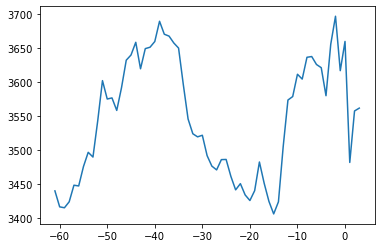

In [36]:
plt.plot(X,ftdays)